In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
#import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)


def my_plot_loop(X,y,plot_type):
    
    list_features = X.columns
    listlength = len(list_features)+1
    f, axes = plt.subplots(listlength, 1, sharey=False, sharex=False , figsize=(min(15,listlength*2), listlength*4) )


    if 'scatter' in plot_type: 
        i = 0
        for column in list_features:
            plt.subplot(axes[i])
            sns.scatterplot(X[column],y, ax=axes[i] )
            i = i + 1
        return None
    
    if 'boxplot' in plot_type: 
        i = 0
        for column in list_features:
            plt.subplot(axes[i])
            sns.boxplot(X[column], ax=axes[i] )
            i = i + 1  
        plt.subplot(axes[i])
        sns.boxplot(y, ax=axes[i] )
        return None
    
    if 'hist' in plot_type: 
        i = 0
        for column in list_features:
            plt.subplot(axes[i])
            plt.title(column)
            plt.hist(X[column], bins="auto")
            i = i + 1  
        plt.subplot(axes[i])
        plt.title('Y Variable' )
        plt.hist(y, bins="auto")  
        return None
    
    else:
        print('Try Again: plot_type must be scatter, boxplot, or histogram')
        return None
        

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')


#Remove outliers
#data = data[data.Newspaper < 90]
data = data[(data.Sales > 3)]
data['Newspaper>25'] = np.where(data.Newspaper > 25, 1, 0)
data['Newspaper_Sqrt'] = np.sqrt(data.Newspaper)
data['Newspaper_Log'] = np.log(data.Newspaper)
data['Newspaper_Square'] = np.square(data.Newspaper)
data['TV_Log'] = np.log(data.TV)
data['TV_Sqrt'] = np.sqrt(data.TV)
data['TV_Square'] = np.square(data.TV)
data['Radio_Square'] = np.square(data.Radio)
data['Radio_Sqrt'] = np.sqrt(data.Radio)
data['TotalSpend'] = data.TV + data.Radio + data.Newspaper
data['TotalSpend_Sqrt'] = np.sqrt(data.TV + data.Radio + data.Newspaper)
data['TotalSpend_Square'] = (data.TV + data.Radio + data.Newspaper) ** 2
data['Percent_Radio'] = data.Radio / data.TotalSpend
data['Percent_Radio_Sqrt'] = np.sqrt(data.Radio / data.TotalSpend)
data['Percent_Radio_Square'] = np.square(data.Radio / data.TotalSpend)
data['Percent_Newspaper'] = data.Newspaper / data.TotalSpend
data['Percent_Newspaper_Sqrt'] = np.sqrt(data.Newspaper / data.TotalSpend)
data['Percent_TV'] = data.TV / data.TotalSpend
data['Percent_TV_Square'] = data.Percent_TV ** 2
data['Percent_Radio>5'] = np.where(data.Percent_Radio > .05, 1, 0)
data['Percent_Newspaper>5'] = np.where(data.Percent_Newspaper > .05, 1, 0)
data['TotalSpend<100'] = np.where(data.TotalSpend < 100, 1, 0)
data['TotalSpend>350'] = np.where(data.TotalSpend > 350 , 1, 0)
data['Sales_Sqrt'] = np.sqrt(data.Sales)

y_var = 'Sales_Sqrt'

data.drop(columns='Unnamed: 0', axis=1, inplace=True)

# Instantiate and fit our model.
list_features = ['TV','Radio', 'Newspaper']
#list_features = ['TV_Sqrt','Radio', 'TotalSpend_Square']
#list_features = ['TotalSpend_Square','Percent_TV_Square','Percent_Radio>5','Percent_Newspaper>5',]


regr = linear_model.LinearRegression()
Y = data[y_var].values.reshape(-1, 1)
X = data[list_features]
regr.fit(X, Y)

# Inspect the results.
display(data.head())
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


,TV,Radio,Newspaper,Sales,Newspaper>25,Newspaper_Sqrt,Newspaper_Log,Newspaper_Square,TV_Log,TV_Sqrt,...,Percent_Radio_Square,Percent_Newspaper,Percent_Newspaper_Sqrt,Percent_TV,Percent_TV_Square,Percent_Radio>5,Percent_Newspaper>5,TotalSpend<100,TotalSpend>350,Sales_Sqrt
0,230.100,37.800,69.200,22.100,1,8.319,4.237,4788.640,5.439,15.169,...,0.013,0.205,0.453,0.683,0.466,1,1,0,0,4.701
1,44.500,39.300,45.100,10.400,1,6.716,3.809,2034.010,3.795,6.671,...,0.093,0.350,0.592,0.345,0.119,1,1,0,0,3.225
2,17.200,45.900,69.300,9.300,1,8.325,4.238,4802.490,2.845,4.147,...,0.120,0.523,0.723,0.130,0.017,1,1,0,0,3.050
3,151.500,41.300,58.500,18.500,1,7.649,4.069,3422.250,5.021,12.309,...,0.027,0.233,0.482,0.603,0.363,1,1,0,0,4.301
4,180.800,10.800,58.400,12.900,1,7.642,4.067,3410.560,5.197,13.446,...,0.002,0.234,0.483,0.723,0.523,0,1,0,0,3.592



Coefficients: 
 [[ 0.00615888  0.02472028 -0.00058402]]

Intercept: 
 [2.22393452]

R-squared:
0.9072906327060865


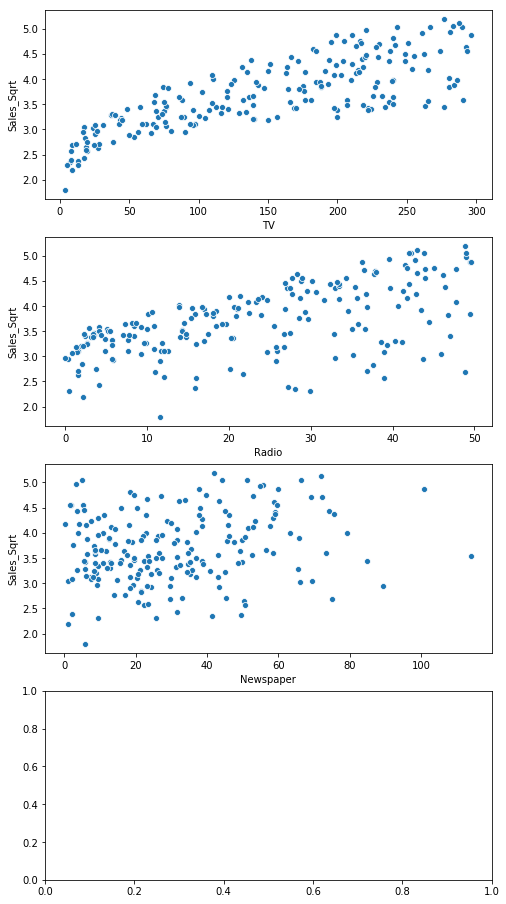

In [3]:
#check for assumption one: linearity

my_plot_loop(data[list_features],data[y_var],'scatter')

In [11]:
print(np.exp(2))

print(2.734 ** 2)

7.38905609893065
7.474756


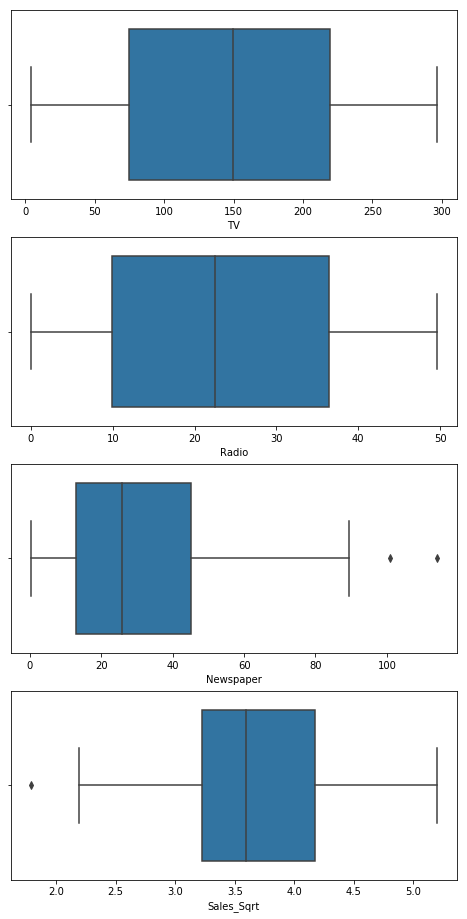

In [4]:
my_plot_loop(data[list_features],data[y_var],'boxplot')

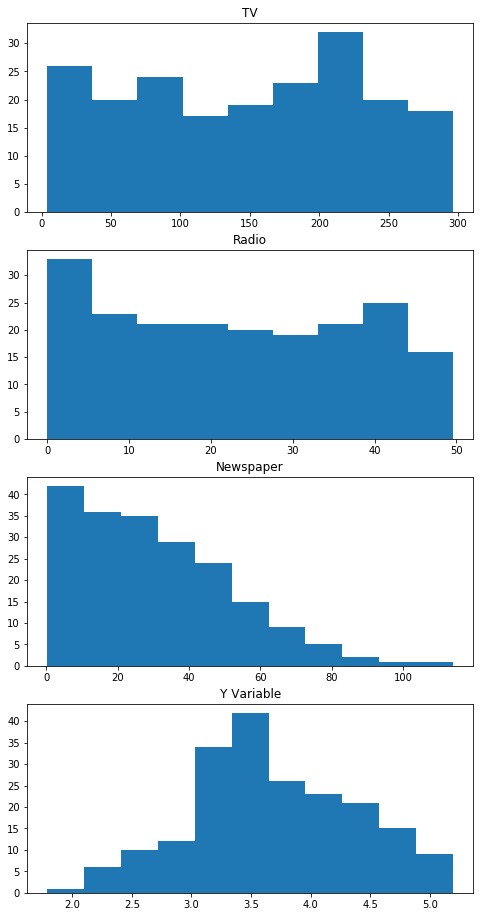

In [5]:
my_plot_loop(data[list_features],data[y_var],'hist')

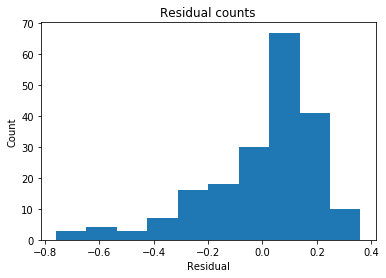

In [6]:
#Check for assumption two: multivariate normality

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data[y_var]

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

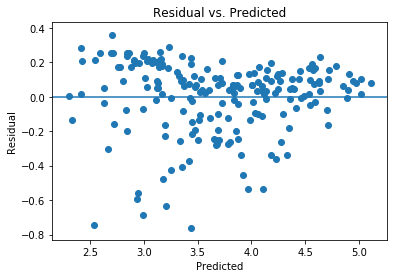

In [7]:
#Check for Assumption three:  homoscedasticity

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [8]:
#Check for Assumption four:  low multicollinearity

correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.065,0.048
Radio,0.065,1.000,0.362
Newspaper,0.048,0.362,1.000
